# 导入所需模块

In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# 导入并查看数据集

In [2]:
data=pd.read_csv('./asia_ranking.csv',encoding="gb2312")
data.head()

,country,2019国际排名,2018世界杯,2015亚洲杯
0,中国,73,40,7
1,日本,60,15,5
2,韩国,61,19,2
3,伊朗,34,18,6
4,沙特,67,26,10


# 数据标准化


In [3]:
X=data[['2019国际排名','2018世界杯', '2015亚洲杯']]
X= preprocessing.scale(X)

# 画出肘部法则图

In [4]:
import random
random.seed(5)
distortions = []
K = range(1,9)
for i in K:
    kmeanModel = KMeans(n_clusters= i, init='k-means++', n_init=10, max_iter= 300).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

C:\Users\86132\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


# 作业：
## 对于一下代码完成函数功能和参数的注释：
for i in K:
    kmeanModel = KMeans(n_clusters= i, init='k-means++', n_init=10, max_iter= 300).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

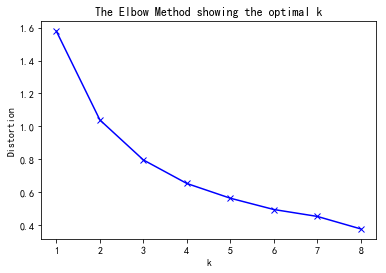

In [5]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# 训练模型，使用模型进行分组

In [6]:
clf= KMeans(n_clusters= 4, init='k-means++', n_init=10, max_iter= 300)
clf.fit(X)
prediction= clf.predict(X)
result= pd.concat([data, pd.DataFrame(prediction)], axis=1)
result.head()

,country,2019国际排名,2018世界杯,2015亚洲杯,0
0,中国,73,40,7,3
1,日本,60,15,5,1
2,韩国,61,19,2,1
3,伊朗,34,18,6,1
4,沙特,67,26,10,1


# 分组结果可视化

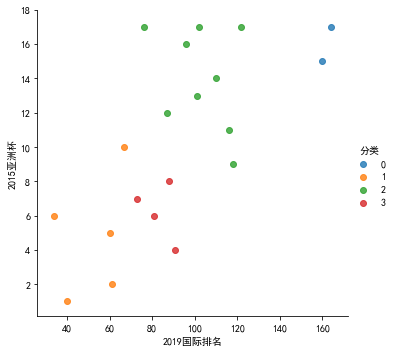

In [7]:
import matplotlib
color={0:'red',1:'blue',2:'green',3:'yellow'}
result.columns=['国家','2019国际排名','2018世界杯', '2015亚洲杯','分类']
sns.lmplot('2019国际排名','2015亚洲杯', data=result, hue='分类', fit_reg=False)
plt.show()